In [19]:
%matplotlib inline

import pandas as pd

r = pd.read_csv( 'ratings.csv' ) #file full of ratings
tr = pd.read_csv( 'to_read.csv' ) #bookss to read by user id
b = pd.read_csv( 'books.csv' )

t = pd.read_csv( 'tags.csv' )
bt = pd.read_csv( 'book_tags.csv')

#some recommneder code taken from https://github.com/csaluja/JupyterNotebooks-Medium/blob/master/CF%20Recommendation%20System-Examples.ipynb


### Ratings

In [2]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Ratings are sorted chronologically, oldest first.

In [3]:
len(r)

5976479

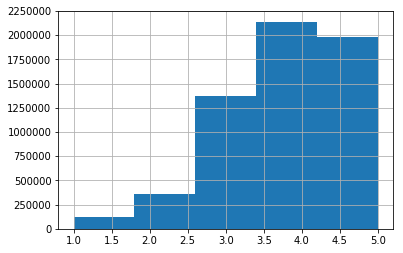

In [4]:
r.rating.hist( bins = 5 )

It appears that 4 is the most popular rating. There are relatively few ones and twos.

### Books

In [5]:
b.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


Books are sorted by their popularity, as measured by number of ratings (overall, not in this dataset).

In [14]:
len(b)

10000

In [6]:
t.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [7]:
bt.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [20]:
bt = bt.merge( t, on = 'tag_id' ) #put tags 
bt.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


In [ ]:
# how many users have read n or more of the same books?

In [28]:
users_count = len(r.user_id.unique()) # we have 53,424 users in the dataset
users_count

53424

In [29]:
read_num_books = r.groupby('user_id').user_id.apply(lambda x:len(x))
#reviews_per_book = r.groupby( 'book_id' ).book_id.apply( lambda x: len( x ))
read_num_books.describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: user_id, dtype: float64

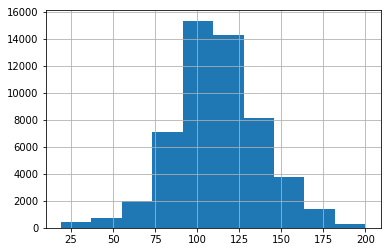

In [30]:
read_num_books.hist()

In [ ]:
#get the book ids for each user
#get users who have at least 10 book ids - all for this group
#for each book id, create a match

In [31]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Everything about this data looks good for a collaborative filtering recommendation system.

In [32]:
d = r.pivot(index='user_id', columns='book_id', values='rating')

In [33]:
d.shape

(53424, 10000)

In [34]:
d.head()

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,NaN,4.0,4.0,NaN,4.0,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
d = d.fillna(0)

In [89]:
mini = d[:1000]
mini.tail()

book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
996,0.0,3.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

In [43]:
# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k')

# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /Users/nmp256/.surprise_data/ml-100k
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9313  0.9324  0.9324  0.9483  0.9339  0.9356  0.0064  
MAE (testset)     0.7340  0.7361  0.7347  0.7472  0.7357  0.7375  0.0049  
Fit time          10.31   12.70   15.16   9.64    10.60   11.68   2.02    
Test time         1.66    0.34    1.16    0.25    0.36    0.75    0.56    


{'test_rmse': array([0.93127152, 0.93236108, 0.93235986, 0.94827548, 0.93389225]),
 'test_mae': array([0.73402093, 0.73609523, 0.73470985, 0.74716198, 0.73569155]),
 'fit_time': (10.309971809387207,
  12.700141906738281,
  15.162220001220703,
  9.641824960708618,
  10.601946830749512),
 'test_time': (1.6574997901916504,
  0.34256410598754883,
  1.1587538719177246,
  0.24945569038391113,
  0.3596491813659668)}

In [44]:
type(data)

surprise.dataset.DatasetAutoFolds

In [45]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation, cosine
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
import sys, os
from contextlib import contextmanager

In [48]:
global k,metric
k=4
metric='cosine'

In [58]:
cosine_sim = 1-pairwise_distances(mini, metric="cosine")

In [60]:
type(cosine_sim)

numpy.ndarray

In [74]:
def findksimilarusers(user_id, ratings, metric = metric, k=k):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(ratings)

    distances, indices = model_knn.kneighbors(ratings.iloc[user_id-1, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
    print ('{0} most similar users for User {1}:\n'.format(k,user_id))
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == user_id:
            continue;
        else:
            print ('{0}: User {1}, with similarity of {2}'.format(i, 
                            indices.flatten()[i]+1, similarities.flatten()[i]))
    return similarities,indices


In [78]:
similarities,indices = findksimilarusers(1,d, metric='cosine')


4 most similar users for User 1:

1: User 12490, with similarity of 0.4024229096732703
2: User 24232, with similarity of 0.3981410086490249
3: User 12459, with similarity of 0.3810315946590659
4: User 19527, with similarity of 0.37415381845495443


In [92]:
similarities,indices = findksimilarusers(1,mini, metric='cosine')


4 most similar users for User 1:

1: User 615, with similarity of 0.3332066427480971
2: User 325, with similarity of 0.3177255134631516
3: User 571, with similarity of 0.3130038255306262
4: User 278, with similarity of 0.3074381495210863


In [85]:
def predict_userbased(user_id, item_id, ratings, metric = metric, k=k):
    prediction=0
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) #similar users based on cosine similarity
    mean_rating = ratings.loc[user_id-1,:].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == user_id:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_id-1]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    print ('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))

    return prediction

In [90]:
predict_userbased(3,4,mini);

4 most similar users for User 3:

1: User 233, with similarity of 0.19890091788894193
2: User 274, with similarity of 0.19393248356283055
3: User 125, with similarity of 0.19024241627636895
4: User 458, with similarity of 0.1853865725886743

Predicted rating for user 3 -> item 4: 4


In [ ]:
#get popular tags
#tag_counts = bt.groupby( 'tag_name' ).tag_name.count().sort_values( ascending = False )
#tag_counts.head( 50)

Let us merge tag names into tag applications.

In [ ]:
bt = bt.merge( t, on = 'tag_id' )

Why don't we merge book titles for good measure.

In [31]:
bt = bt.merge( b[[ 'goodreads_book_id', 'title']], on = 'goodreads_book_id' )

It appears that there are some negative tag counts. Let's fix this.

In [40]:
bt['count'].describe()

count    999912.000000
mean        208.869633
std        3501.265173
min          -1.000000
25%           7.000000
50%          15.000000
75%          40.000000
max      596234.000000
Name: count, dtype: float64

In [41]:
bt.loc[ bt['count'] < 0, 'count'] = 0

Sample some popular book tags.

In [42]:
bt.sample( 10, weights = 'count')

,goodreads_book_id,tag_id,count,tag_name,title
248904,46164,5207,386,books-i-own,Tender Is the Night
661994,6261522,30574,74453,to-read,"The Body Finder (The Body Finder, #1)"
299800,73084,30574,2696,to-read,"Heaven, Texas (Chicago Stars, #2)"
10975,1232,14487,2973,historical-fiction,The Shadow of the Wind (The Cemetery of Forgot...
17200,2156,30574,220502,to-read,Persuasion
560394,821611,30574,104249,to-read,The Story of My Life
36284,4865,24410,69,professional-development,How to Win Friends and Influence People
766394,10194514,30574,122130,to-read,"Pushing the Limits (Pushing the Limits, #1)"
864774,16056862,2932,43,arranged-marriage,"The Unwanted Wife (Unwanted, #1)"
12114,1381,7457,14238,classics,The Odyssey


These are the most popular tags:

In [28]:
tag_counts = bt.groupby( 'tag_name' ).tag_name.count().sort_values( ascending = False )
tag_counts.head( 20 )

tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
library              9415
owned-books          9221
fiction              9097
to-buy               8692
kindle               8316
default              8239
ebook                8054
my-books             7561
audiobook            7242
ebooks               7203
wish-list            7192
my-library           7000
audiobooks           6862
i-own                6670
adult                6604
Name: tag_name, dtype: int64